# **CasoPractico2: Customer Segmentation (Aprendizaje No Supervisado)**

En primer lugar se importan las librerías necesarias, se suprimen los warnings y se cargan los csv necesarios para conformar el dataset.

In [115]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# EDA

  1. **Carga de datos**

In [116]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

  2. Dimensiones de los datasets

In [117]:
print("Dimensiones de train.csv:", train_df.shape)
print("Dimensiones de test.csv:", test_df.shape)

Dimensiones de train.csv: (8068, 11)
Dimensiones de test.csv: (2627, 10)


  3. Inspección de los datos

In [118]:
print("=== train.csv ===")
train_df.info()
print("\nPrimeras filas:")
print(train_df.head())

print("\n=== test.csv ===")
test_df.info()
print("\nPrimeras filas:")
print(test_df.head())

=== train.csv ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB

Primeras filas:
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   3

  4. Estadísticas descriptivas

In [119]:
train_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


  5. Distribución de variables

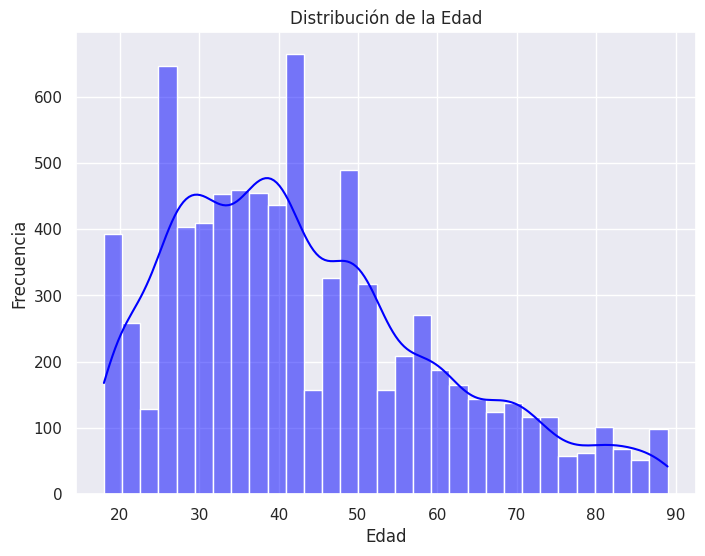

In [120]:

# Histograma de Edad
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True, color='blue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()




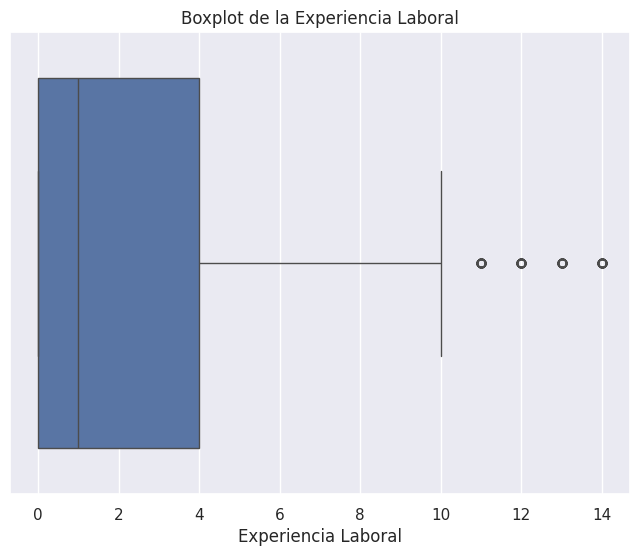

In [121]:
# Boxplot para ver outliers en la experiencia laboral
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['Work_Experience'])
plt.title('Boxplot de la Experiencia Laboral')
plt.xlabel('Experiencia Laboral')
plt.show()

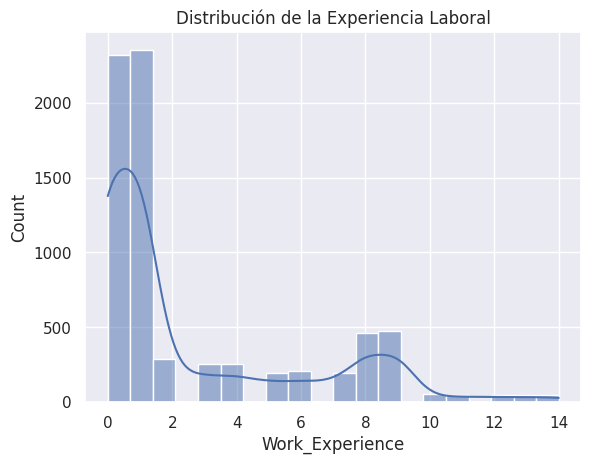

In [122]:
# Histograma de la variable Work_Experience
sns.histplot(train_df['Work_Experience'], kde=True, bins=20)
plt.title('Distribución de la Experiencia Laboral')
plt.show()

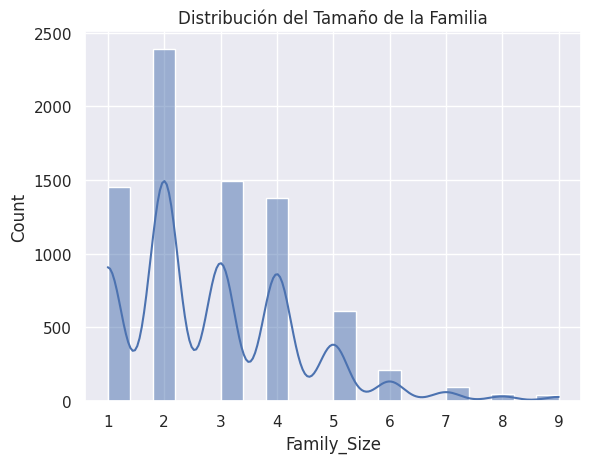

In [123]:
# Histograma de la variable Family_Size
sns.histplot(train_df['Family_Size'], kde=True, bins=20)
plt.title('Distribución del Tamaño de la Familia')
plt.show()

  6. Relación entre variables

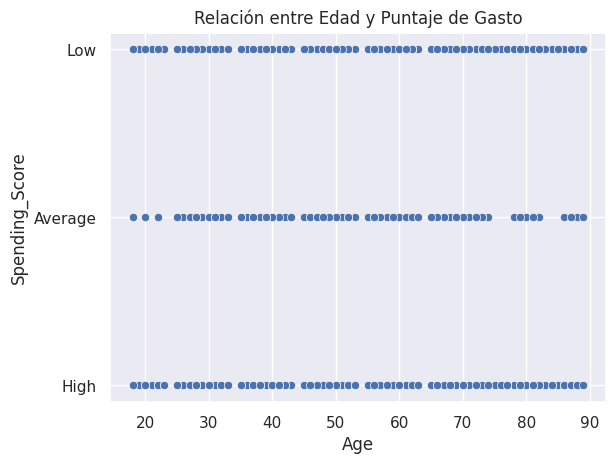

In [124]:
sns.scatterplot(x='Age', y='Spending_Score', data=train_df)
plt.title('Relación entre Edad y Puntaje de Gasto')
plt.show()

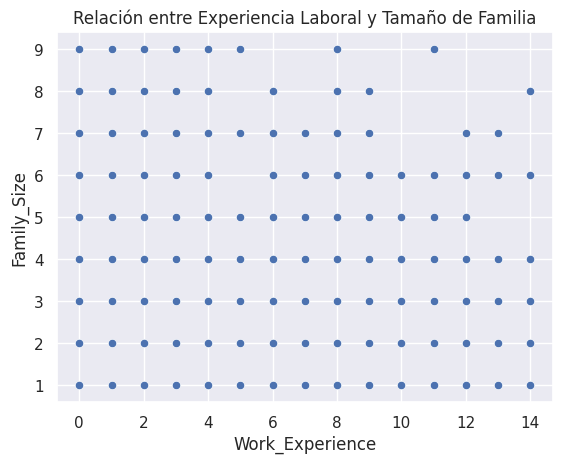

In [125]:
sns.scatterplot(x='Work_Experience', y='Family_Size', data=train_df)
plt.title('Relación entre Experiencia Laboral y Tamaño de Familia')
plt.show()

  7. Distribución de variables categóricas

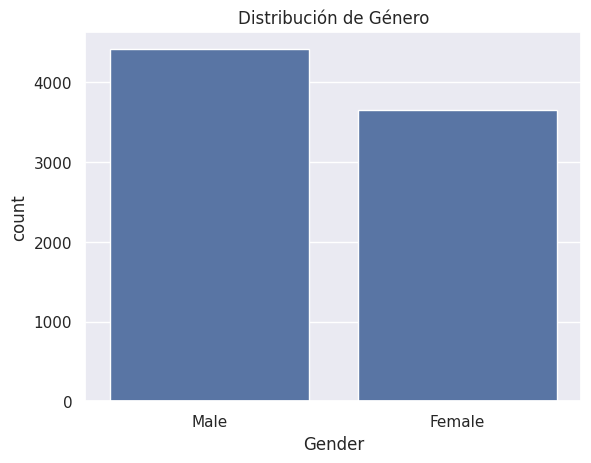

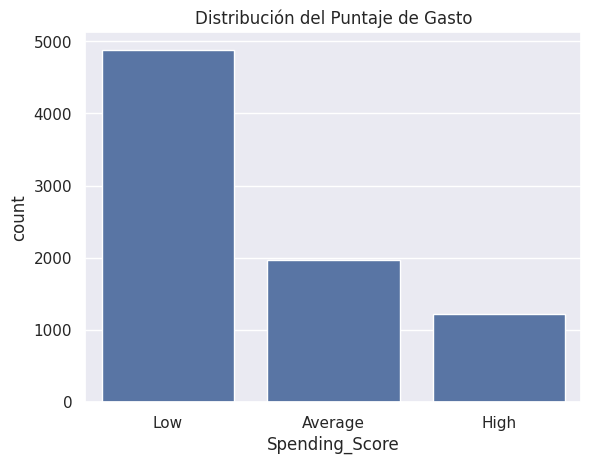

In [126]:
# Distribución de la variable Gender
sns.countplot(x='Gender', data=train_df)
plt.title('Distribución de Género')
plt.show()

# Distribución de la variable Spending_Score
sns.countplot(x='Spending_Score', data=train_df)
plt.title('Distribución del Puntaje de Gasto')
plt.show()


  8. Valores atípicos (outliers)

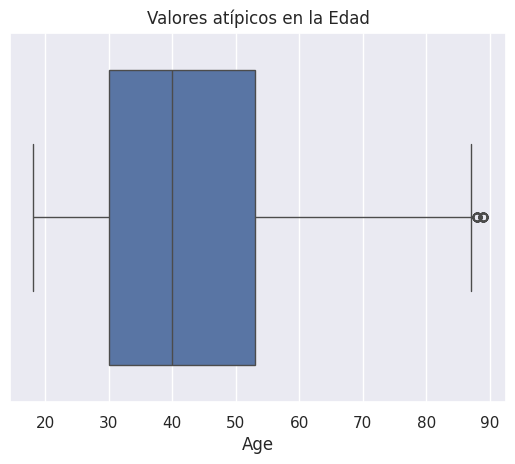

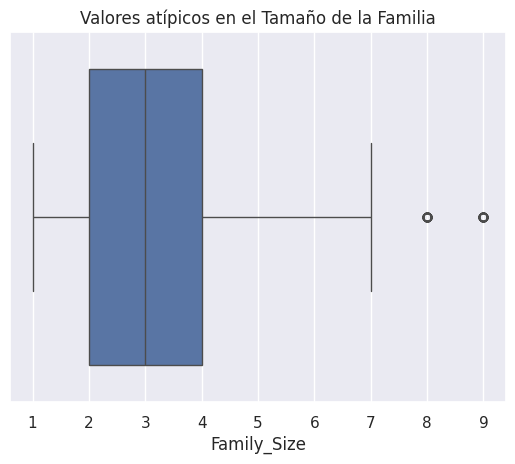

In [127]:
# Boxplot de la variable Age
sns.boxplot(x=train_df['Age'])
plt.title('Valores atípicos en la Edad')
plt.show()


# Boxplot de la variable Family_Size
sns.boxplot(x=train_df['Family_Size'])
plt.title('Valores atípicos en el Tamaño de la Familia')
plt.show()

Spending_Score  Average  High   Low
Gender                             
Female              831   490  2330
Male               1143   726  2548


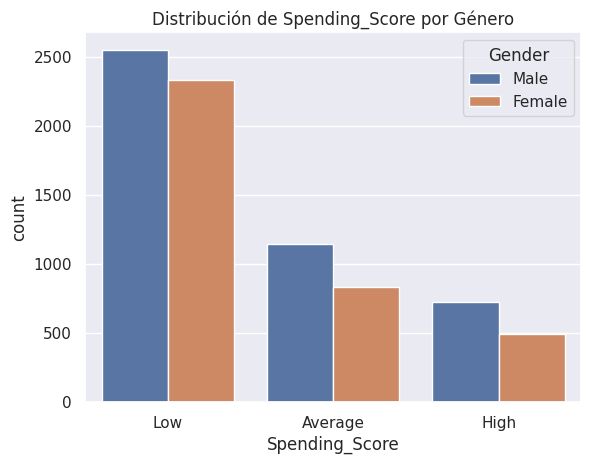

In [128]:
contingency_table = pd.crosstab(train_df['Gender'], train_df['Spending_Score'])
print(contingency_table)
sns.countplot(x='Spending_Score', hue='Gender', data=train_df)
plt.title('Distribución de Spending_Score por Género')
plt.show()

  9. Matriz de correlación

In [129]:
corr_matrix = train_df.corr(numeric_only=True)
train_df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.030688,0.011801
Age,-0.005055,1.000000,-0.190789,-0.280517
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234
Family_Size,0.011801,-0.280517,-0.063234,1.000000


  10. Análisis de valores nulos

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


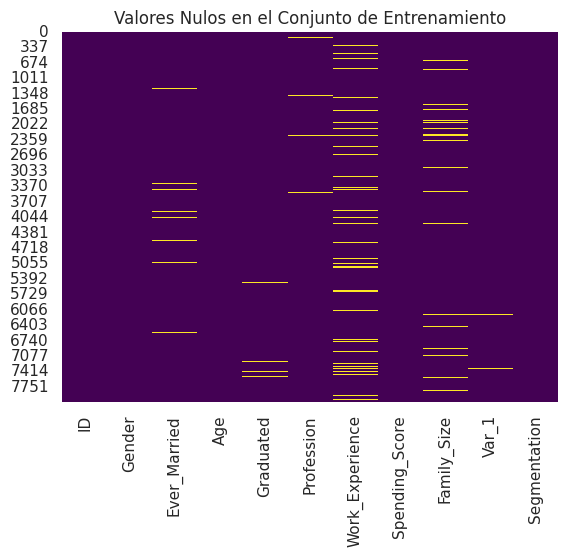

In [130]:
# Muestra la cantidad de valores nulos por columna
print(train_df.isnull().sum())

# Visualiza los valores nulos con un mapa de calor
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos en el Conjunto de Entrenamiento')
plt.show()

In [131]:
# porcentaje de valores nulos por columna
missing_percentage = train_df.isnull().mean() * 100

# porcentaje de valores nulos
missing_percentage = missing_percentage.sort_values(ascending=False)

# primeras filas para ver las columnas con más valores nulos
print(missing_percentage.head())

Work_Experience    10.275161
Family_Size         4.152206
Ever_Married        1.735250
Profession          1.536936
Graduated           0.966782
dtype: float64


In [132]:
# Comprobar si hay valores duplicados.
train_df.loc[train_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [133]:
# Comprobar la distribucion de la variable objetivo (Survived)
train_df['Segmentation'].value_counts(normalize=True)

,proportion
Segmentation,
D,0.281111
A,0.244422
C,0.244175
B,0.230293


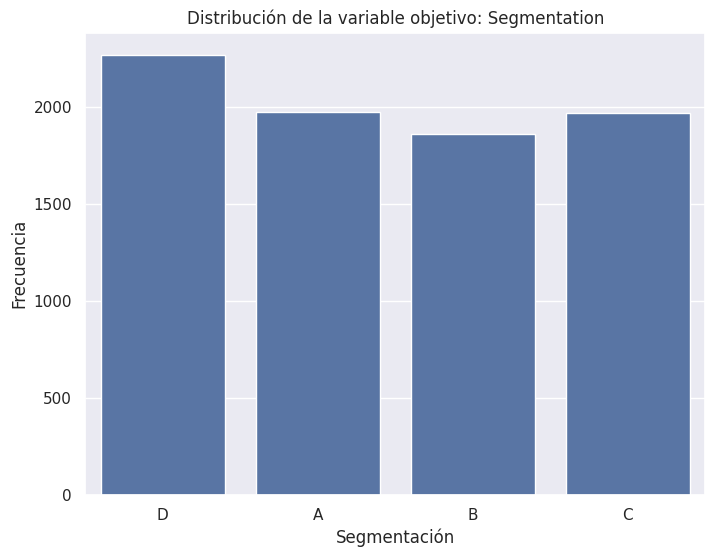

In [134]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Segmentation', data=train_df)
plt.title('Distribución de la variable objetivo: Segmentation')
plt.xlabel('Segmentación')
plt.ylabel('Frecuencia')
plt.show()

Dimensiones del dataset: El conjunto de datos tiene 8068 filas y 11 columnas (en el dataset train).

Columnas numéricas: Age, Work_Experience, Family_Size.

Columnas categóricas: Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1, Segmentation.

Valores faltantes:

Ever_Married, Graduated, Profession, Work_Experience, Family_Size tienen algunos valores nulos.

No hay valores duplicados en el conjunto de datos.

Distribución de la variable objetivo (Segmentation):

La distribución está algo desequilibrada, con categorías más frecuentes que otras.

Distribución de las características:

Age: Distribución bastante amplia, sin valores extremos.

Work_Experience: Tiene una distribución sesgada hacia valores más bajos.

Family_Size: Distribución algo sesgada, con algunos valores bajos.

Spending_Score: Tres categorías claras (Low, Average, High).

Relación entre variables:

Age muestra una ligera correlación con Spending_Score.

Gender y Spending_Score también muestran patrones relacionados.


# Preprocesamiento

1. Manejo de valores faltantes

In [135]:
# Verificar los valores faltantes en cada columna
train_df.isnull().sum()


,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


Variables numéricas: rellenar los valores faltantes con la mediana.

Variables categóricas: Se puede rellenar con la moda.

In [136]:
train_df['Work_Experience'] = train_df['Work_Experience'].fillna(train_df['Work_Experience'].median())
train_df['Family_Size'] = train_df['Family_Size'].fillna(train_df['Family_Size'].median())


In [137]:
train_df['Ever_Married'] = train_df['Ever_Married'].fillna(train_df['Ever_Married'].mode()[0])
train_df['Graduated'] = train_df['Graduated'].fillna(train_df['Graduated'].mode()[0])
train_df['Profession'] = train_df['Profession'].fillna(train_df['Profession'].mode()[0])

In [138]:
train_df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,76


In [139]:
# Eliminar columnas no relevantes.

columns_to_drop = ['ID', 'Segmentation', 'Var_1']
train_df.drop(columns=columns_to_drop, inplace=True)
print(train_df.columns)


Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size'],
      dtype='object')


  2. Codificar variables categóricas

In [140]:
# Codificar variables categóricas usando One-Hot Encoding y codificación binaria para 'Gender'
train_df = pd.get_dummies(train_df, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'], drop_first=True)
train_df.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,True,False,False,False,False,False,False,True,False,False,False,False,True
1,38,1.0,3.0,False,True,True,False,True,False,False,False,False,False,False,False,False
2,67,1.0,1.0,False,True,True,False,True,False,False,False,False,False,False,False,True
3,67,0.0,2.0,True,True,True,False,False,False,False,False,False,True,False,True,False
4,40,1.0,6.0,False,True,True,False,False,True,False,False,False,False,False,True,False


3. Manejo de valores nulos

In [141]:
# Imputar valores nulos en Family_Size con la media
train_df['Family_Size'].fillna(train_df['Family_Size'].mean(), inplace=True)

# Imputar valores nulos en Work_Experience con la mediana
train_df['Work_Experience'].fillna(train_df['Work_Experience'].median(), inplace=True)

Escalado de variables porque es importante para el clustering. Para que las características tengan una media de 0 y una desviación estándar de 1.

In [142]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas para escalar
num_columns = ['Age', 'Family_Size', 'Work_Experience']

# Aplicar el escalado
scaler = StandardScaler()
train_df[num_columns] = scaler.fit_transform(train_df[num_columns])

In [143]:
train_df.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,-1.284623,-0.451136,0.762698,True,False,False,False,False,False,False,True,False,False,False,False,True
1,-0.327151,-0.451136,0.095802,False,True,True,False,True,False,False,False,False,False,False,False,False
2,1.408268,-0.451136,-1.237990,False,True,True,False,True,False,False,False,False,False,False,False,True
3,1.408268,-0.757410,-0.571094,True,True,True,False,False,False,False,False,False,True,False,True,False
4,-0.207467,-0.451136,2.096491,False,True,True,False,False,True,False,False,False,False,False,True,False


4. Verificar valores atípicos

In [144]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
Q1 = train_df[numerical_cols].quantile(0.25)
Q3 = train_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = ((train_df[numerical_cols] < lower_limit) | (train_df[numerical_cols] > upper_limit))


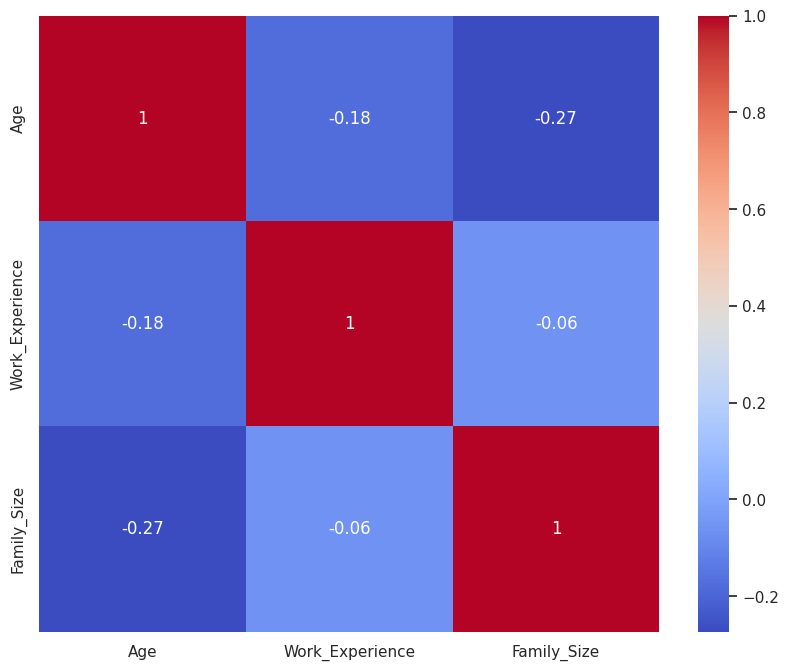

In [145]:
corr_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

5. Aplicar PCA

Varianza explicada por PC1: 0.19
Varianza explicada por PC2: 0.10


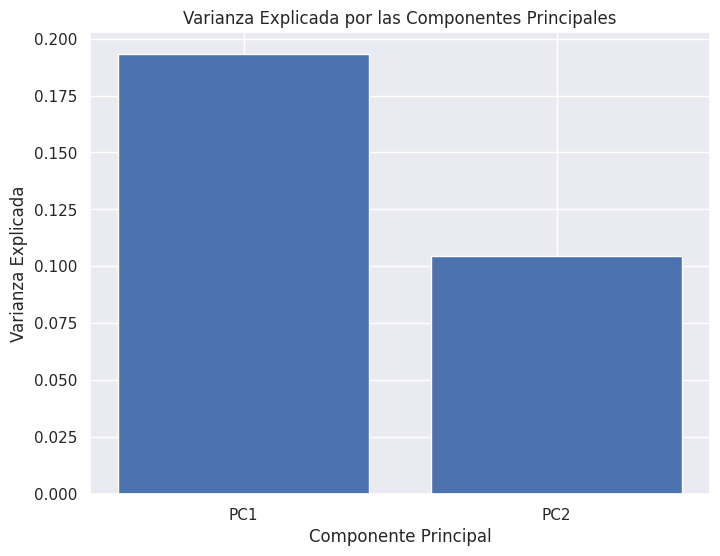

In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)

pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
train_df_pca = pca.fit_transform(train_df_scaled)


# Crear un DataFrame con las componentes principales
train_df_pca_df = pd.DataFrame(train_df_pca, columns=["PC1", "PC2"])

# Mostrar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2f}")

# Visualizar la varianza explicada por las primeras 2 componentes
plt.figure(figsize=(8, 6))
plt.bar([1, 2], explained_variance, tick_label=["PC1", "PC2"])
plt.title("Varianza Explicada por las Componentes Principales")
plt.xlabel("Componente Principal")
plt.ylabel("Varianza Explicada")
plt.show()




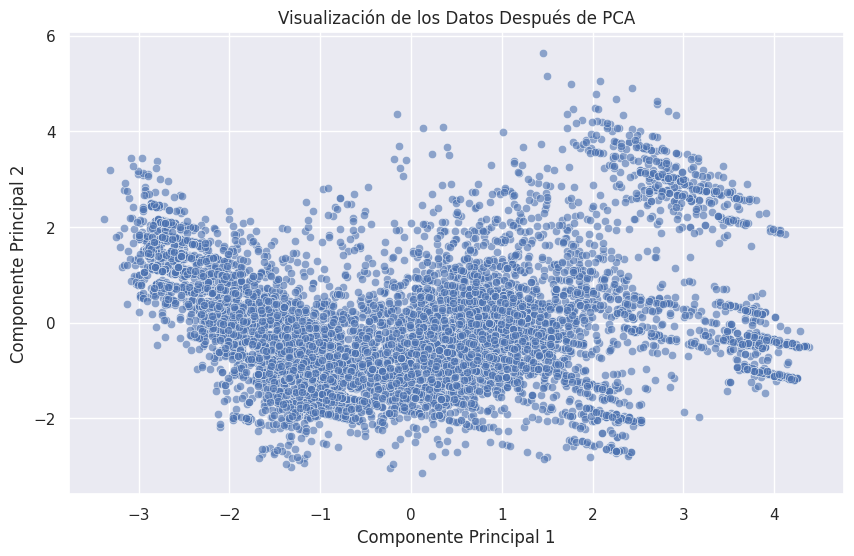

In [148]:
# Visualización de los datos en las primeras 2 componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df_pca_df['PC1'], y=train_df_pca_df['PC2'], alpha=0.6)
plt.title("Visualización de los Datos Después de PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Implementación

In [150]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

X = train_df_pca_df[['PC1', 'PC2']]

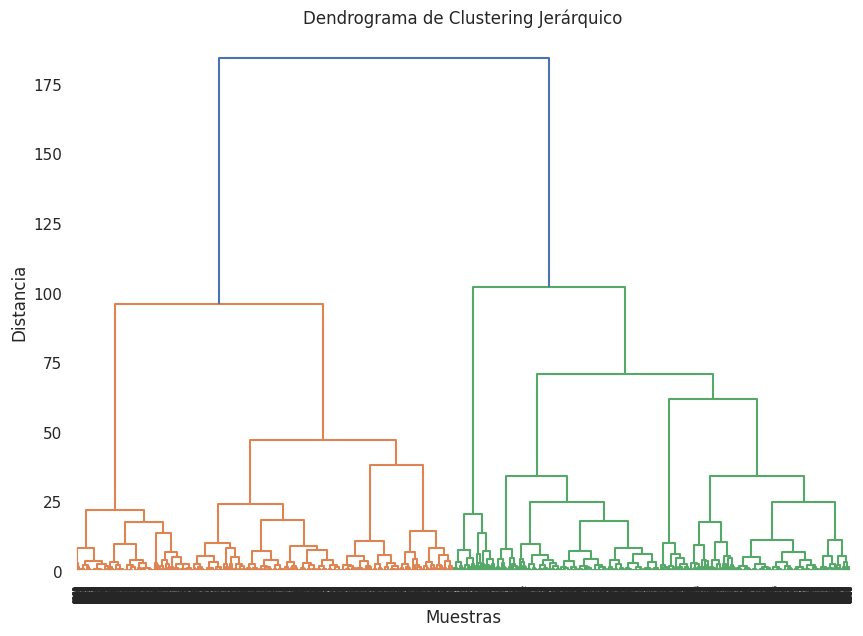

In [151]:
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()


Custering Jerárquico

In [153]:
# Aplicar Clustering Jerárquico con 4 clusters
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
train_df_pca_df['Cluster_Hierarchical'] = hc.fit_predict(X)

# Mostrar los primeros registros con las etiquetas de clusters
print(train_df_pca_df.head())

        PC1       PC2  Cluster_Hierarchical
0 -2.632078  1.742060                     3
1  0.649226 -0.740455                     0
2  0.744284 -2.179781                     0
3  3.780903 -0.252638                     0
4  1.580933  1.207878                     0


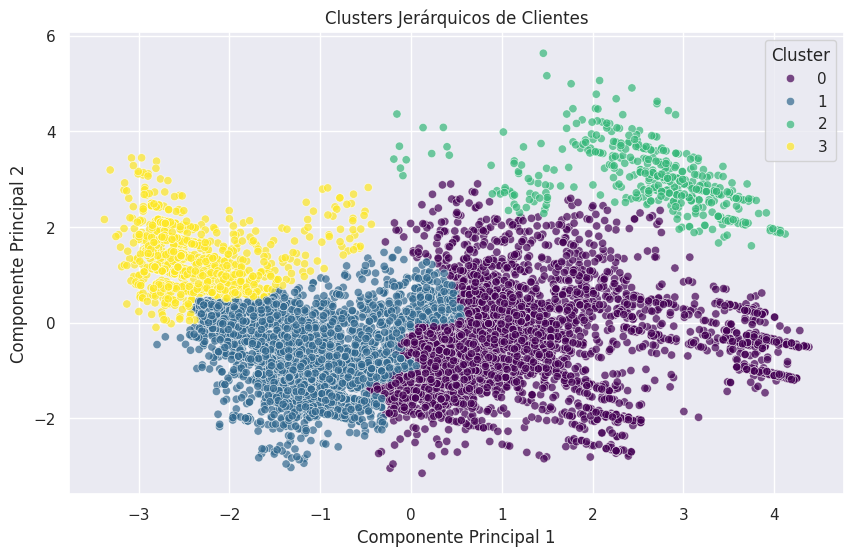

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df_pca_df['PC1'], y=train_df_pca_df['PC2'], hue=train_df_pca_df['Cluster_Hierarchical'], palette='viridis', alpha=0.7)
plt.title("Clusters Jerárquicos de Clientes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()


In [155]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, train_df_pca_df['Cluster_Hierarchical'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3702


K-Means

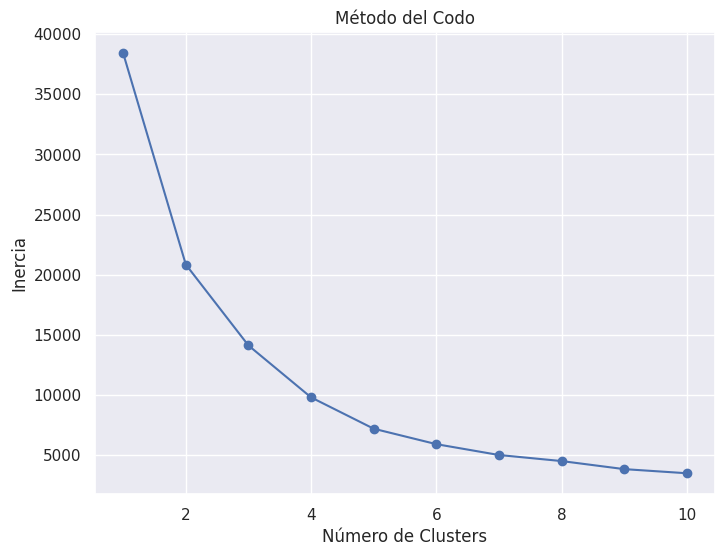

In [156]:
from sklearn.cluster import KMeans

# Determinar el rango de posibles valores de K (por ejemplo, de 1 a 10)
inertia = []

for k in range(1, 11):  # Probar con valores de K entre 1 y 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Aquí X son tus datos escalados o PCA
    inertia.append(kmeans.inertia_)  # Guarda la inercia

# Graficar el resultado para ver el codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [157]:
# Aplicar K-Means con el número de clusters ( K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
train_df_pca_df['Cluster_KMeans'] = kmeans.fit_predict(X)  # Aquí X son tus datos escalados o PCA


train_df_pca_df.head()

,PC1,PC2,Cluster_Hierarchical,Cluster_KMeans
0,-2.632078,1.742060,3,1
1,0.649226,-0.740455,0,2
2,0.744284,-2.179781,0,0
3,3.780903,-0.252638,0,2
4,1.580933,1.207878,0,2


In [158]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
sil_score = silhouette_score(X, train_df_pca_df['Cluster_KMeans'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.41740017072338365


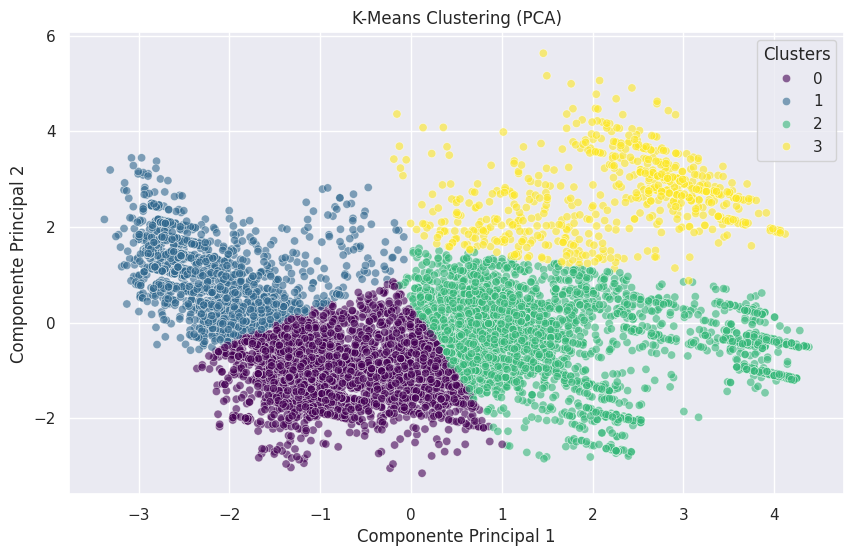

In [160]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df_pca_df, x="PC1", y="PC2", hue="Cluster_KMeans", palette="viridis", alpha=0.6)
plt.title("K-Means Clustering (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.show()

In [161]:
print("Inercia de K-Means:", kmeans.inertia_)


Inercia de K-Means: 9818.760088288514


DBSCAN

In [163]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)  # X es tu conjunto de datos escalado

# Añadir la columna de clusters al DataFrame
train_df_pca_df['Cluster_DBSCAN'] = dbscan_clusters

# Evaluar el modelo con el Silhouette Score
sil_score_dbscan = silhouette_score(X, dbscan_clusters)
print("Silhouette Score para DBSCAN:", sil_score_dbscan)

# Mostrar los clusters encontrados por DBSCAN
print("Número de clusters encontrados por DBSCAN:", len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0))

Silhouette Score para DBSCAN: 0.47203599821981435
Número de clusters encontrados por DBSCAN: 1


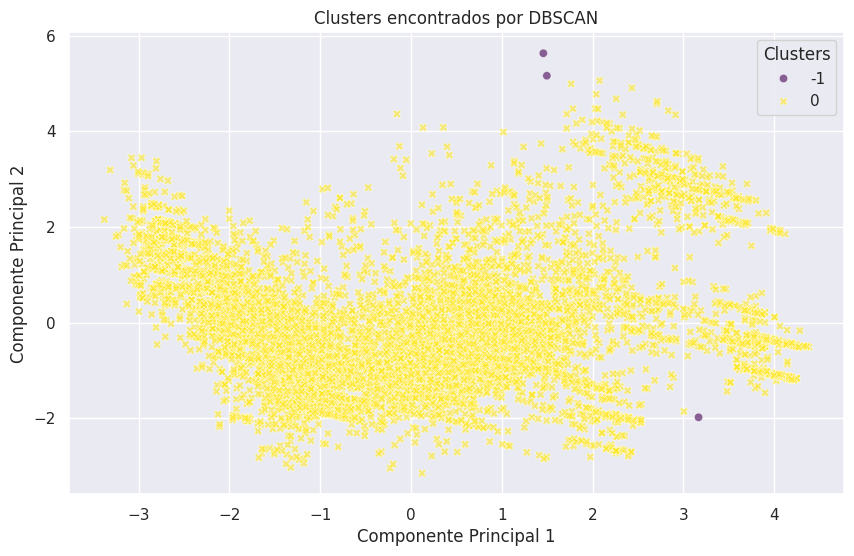

In [164]:
plt.figure(figsize=(10, 6))

# Colorear según los clusters encontrados por DBSCAN
sns.scatterplot(x=train_df_pca_df['PC1'], y=train_df_pca_df['PC2'],
                hue=train_df_pca_df['Cluster_DBSCAN'], palette='viridis',
                style=train_df_pca_df['Cluster_DBSCAN'], markers=['o', 'X', '^', 's', 'D'],
                legend='full', alpha=0.6)

# Configuración del gráfico
plt.title('Clusters encontrados por DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title="Clusters")
plt.show()

# Análisis

Después de probar los tres métodos de clustering, los resultados han sido los siguientes:

DBSCAN: Solo encontró un grupo, lo cual me sorprendió. Esto podría significar que, en mis datos, no hay una distinción clara entre varios grupos. Quizás los datos están tan mezclados que no es posible dividirlos en más de un grupo.

K-Means: Encontró 4 grupos, y el resultado fue bastante bueno, con un Silhouette Score de 0.417. Este método parece ser el que mejor segmenta a los datos en grupos, aunque no estoy completamente seguro de si esos 4 grupos son realmente los más adecuados. Parece funcionar, pero podría ser que los datos tengan una estructura diferente.

Clustering Jerárquico: También encontró 4 grupos, pero la calidad no fue tan buena como el K-Means. El Silhouette Score fue más bajo (0.3702), lo que me hace pensar que esos 4 grupos no son tan claros y definidos como los del K-Means.

Lo que pienso de todo esto:
K-Means parece ser el que mejor segmenta los datos en grupos, por lo que si quiero usar los clusters para algo como hacer marketing o algo relacionado con clientes, probablemente elegiría este.

DBSCAN, al detectar solo un grupo, me hace pensar que mis datos no tienen una estructura clara de diferentes grupos. Si los clientes no tienen muchas diferencias claras, tal vez este método sea útil.

Clustering Jerárquico no fue tan bueno porque los grupos que formó no fueron tan sólidos como los de K-Means, por lo que probablemente no lo usaría.